<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-1-Sprint-2-Statistics/blob/master/11pm_Copy_of_DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [39]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#replace missing values with '?' & load data
df = pd.read_csv('crx.data',na_values='?')

'''
Validate that it has the appropriate number of observations 
df.shape  # returns (689, 16) 

df.tail()

df.describe()

df.head()
'''

'\nValidate that it has the appropriate number of observations \ndf.shape  # returns (689, 16) \n\ndf.tail()\n\ndf.describe()\n\ndf.head()\n'

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. 
[pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

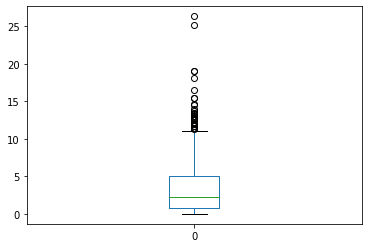

In [42]:
#split df  using class labels; 
plus = df.loc[df['+'] == '+']  #  + seems to be a grp of people approved for credit
minus = df.loc[df['+'] == '-'] #  - seems to be a grp of people NOT approved for credit

'''
Explore data  by creating a box & whisker plot using split df subgrps:

Y axis is numerical values under '0' ~column
X axis is the col we are looking at to examen if there is a statistically significant difference between this and the minus group's '0' col

the boxplot is higher for col '0' in the plus subset (top whisker to top of box indicates the top 25% of "plus" people have higher range of y values,
compared to  'minus' people)

for bottom 25% this is also true

green line is mean for both grps
'''

# Create a box plot for minus grp 
minus['0'].plot.box()



'\nY axis is numerical values under \'0\' ~column\nX axis is the col we are looking at to examen if there is a statistically significant difference between this and the minus group\'s \'0\' col\n\nthe boxplot is higher for col \'0\' in the plus subset (top whisker to top of box indicates the top 25% of "plus" people have higher range of y values,\ncompared to  \'minus\' people)\n\nfor bottom 25% this is also true\n\ngreen line is mean for both grps\n'

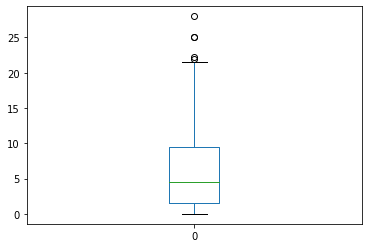

In [41]:
#create box & whisker plot of plus df subset
plus['0'].plot.box()


In [44]:
'''
t test to chk if the differences in the plus and minus col '0' vals are statistically signif
Null hypoth: they are NOT stat'ly diff
Alt hyp: they are
'''

from scipy.stats import ttest_ind
ttest_ind(plus['0'], minus['0'])

'''
Returns: 
Ttest_indResult(statistic=5.5785223709472715, pvalue=3.490724496507552e-08)
 because p value is < 0.05, we REJECT the NULL HYP, meaning 
 the observed diff IS stat'ly diff

'''

'\nReturns: \nTtest_indResult(statistic=5.5785223709472715, pvalue=3.490724496507552e-08)\n because p value is < 0.05, we REJECT the NULL HYP, meaning \n\n'

In [0]:
'''
Examen col called ~'1.25', again with box & whisker plots of plus and minus subgrps.
small circles on top of top whisker are outliers
'''
plus['1.25'].plot.box()




In [15]:
 #sep only - class 
 minus = df.loc[df['+'] == '-'] 
 minus

,ib,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
69,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
70,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
71,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
72,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
73,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260.0,0,-
685,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200.0,394,-
686,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200.0,1,-
687,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,280.0,750,-


In [35]:
import numpy as np
import seaborn as sns
import pandas as pd

#crosstab with class label as index?
#pd.crosstab('+'...)

#EAD2: Using groupby to split by class label
plus = df.groupby(df['+'])
plus



In [0]:
# EAD 3) create pivot table
# df.pivot = df.pivot_table(index='+', columns= 'ib', '30.83', 'O')



In [34]:
# t test on 2nd column ~called '30.83'

import pandas as pd
import numpy as np
from scipy import stats

df.describe()  # summarize only numeric data 

,30.83,0,1.25,01,00202,0.1
count,677.000000,689.000000,689.000000,689.000000,676.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,183.988166,1018.862119
std,11.966670,4.978470,3.348739,4.866180,173.934087,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,74.500000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,277.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*